# Análisis de base de datos "Housing"

* En este proyecto se realizó el análisis de una base de datos que contiene información de casas en venta en Estados Unidos, esto con el fin de obtener informacón relevante en cuanto a la relación entre el precio de las casas y sus características.
* La base de datos que se utilizó para el proyecto se encuentra en el siguiente link:
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
___________________________________________

## Setup

In [1]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura del archivo

In [ ]:
os.chdir('C:/Users/estef/Desktop/data')
df = pd.read_csv('HOUSING.csv')
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
444,3220000,3120,3,1,2,no,no,no,no,no,0,no,furnished
47,7490000,6600,3,1,4,yes,no,no,no,yes,3,yes,furnished
314,4095000,4040,2,1,2,yes,no,no,no,no,1,no,semi-furnished
153,5530000,3300,3,3,2,yes,no,yes,no,no,0,no,semi-furnished
110,6090000,6600,3,1,1,yes,yes,yes,no,no,2,yes,semi-furnished


## Exploratory Data Analysis

In [3]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [7]:
pd.set_option('display.float_format',lambda x: '%.1f' % x)

In [8]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [9]:
# Cambiar valores de cadenas (ej. yes/no) a números (ej. 1/0)
# Es un dataset completo, no es necesario imputar datos

## Feature Engineering

In [10]:
#Reemplazar cadenas por números
df['mainroad'] = df['mainroad'].replace({'yes':1,'no':0}, regex=True)
df['guestroom'] = df['guestroom'].replace({'yes':1,'no':0}, regex=True)
df['basement'] = df['basement'].replace({'yes':1,'no':0}, regex=True)
df['hotwaterheating'] = df['hotwaterheating'].replace({'yes':1,'no':0}, regex=True)
df['airconditioning'] = df['airconditioning'].replace({'yes':1,'no':0}, regex=True)
df['prefarea'] = df['prefarea'].replace({'yes':1,'no':0}, regex=True)
df['furnishingstatus'] = df['furnishingstatus'].replace({'unfurnished':3,'semi-furnished':2,'furnished':1}, regex=True)

C:\Users\estef\AppData\Local\Temp\ipykernel_22308\1741863506.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['mainroad'] = df['mainroad'].replace({'yes':1,'no':0}, regex=True)
C:\Users\estef\AppData\Local\Temp\ipykernel_22308\1741863506.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['guestroom'] = df['guestroom'].replace({'yes':1,'no':0}, regex=True)
C:\Users\estef\AppData\Local\Temp\ipykernel_22308\1741863506.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versio

In [11]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
117,5950000,3700,4,1,2,1,1,0,0,1,0,0,1
468,3010000,2835,2,1,1,1,0,0,0,0,0,0,2
350,3780000,3420,2,1,2,1,0,0,1,0,1,0,2
536,1960000,3420,5,1,2,0,0,0,0,0,0,0,3
247,4550000,8400,4,1,4,1,0,0,0,0,3,0,3
30,8400000,7475,3,2,4,1,0,0,0,1,2,0,3
327,3990000,6480,3,1,2,0,0,0,0,1,1,0,2
199,4907000,4200,3,1,2,1,0,0,0,0,1,0,1
225,4753000,6440,2,1,1,1,0,0,0,1,3,0,2
449,3150000,1650,3,1,2,0,0,1,0,0,0,0,3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


#### Análisis Correlación / Bivariado

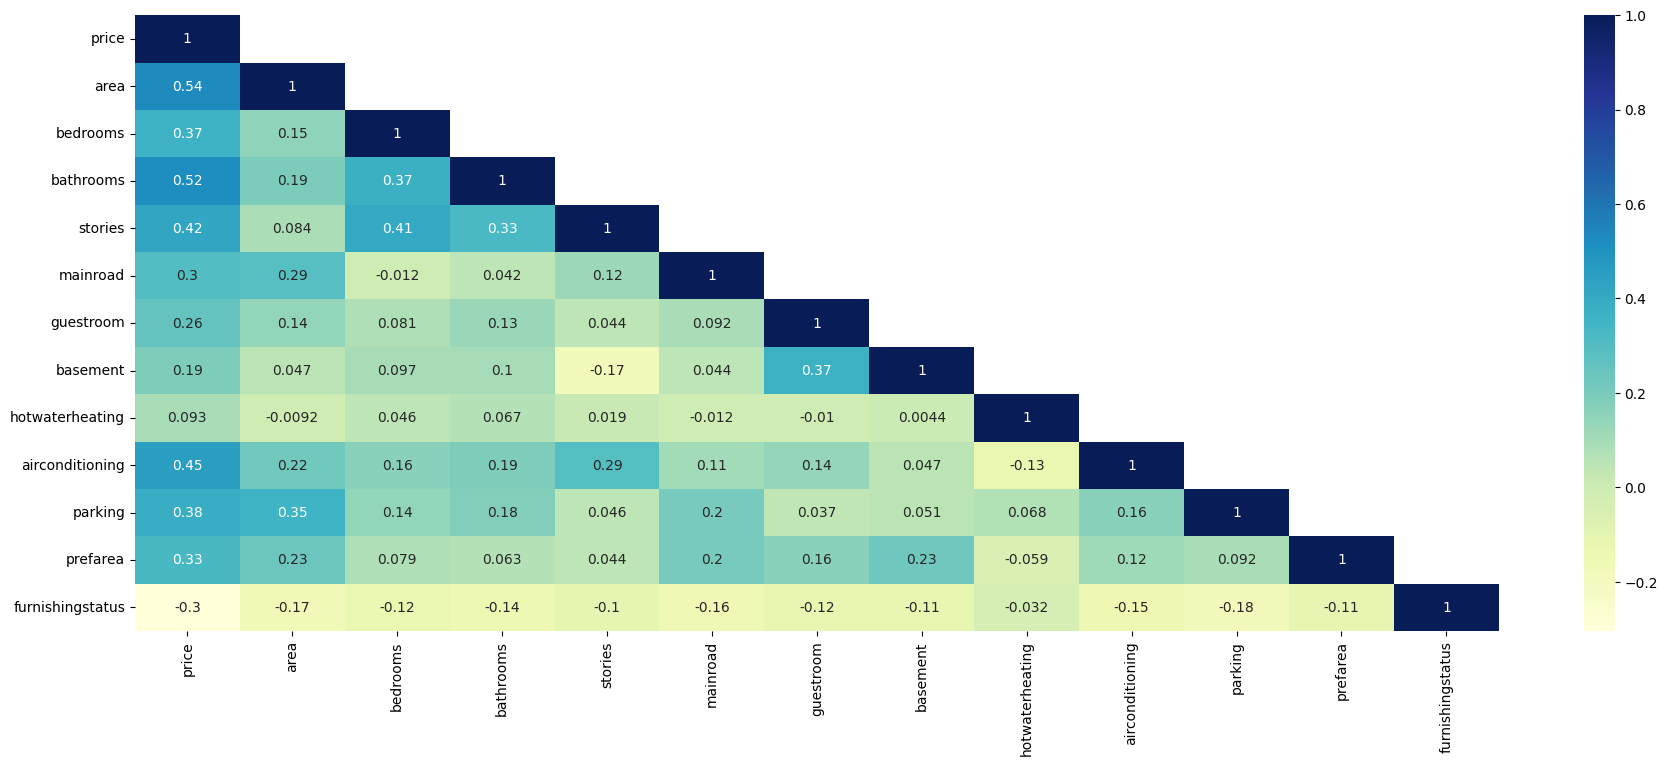

In [13]:
plt.figure(figsize = (22,8))
corr_df = corr = df.corr(method = 'pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap='YlGnBu', annot = True)

In [14]:
def ColNum(x):
    numeric_columns = x.select_dtypes(include=['number'])
    return numeric_columns

df_num = ColNum(df)

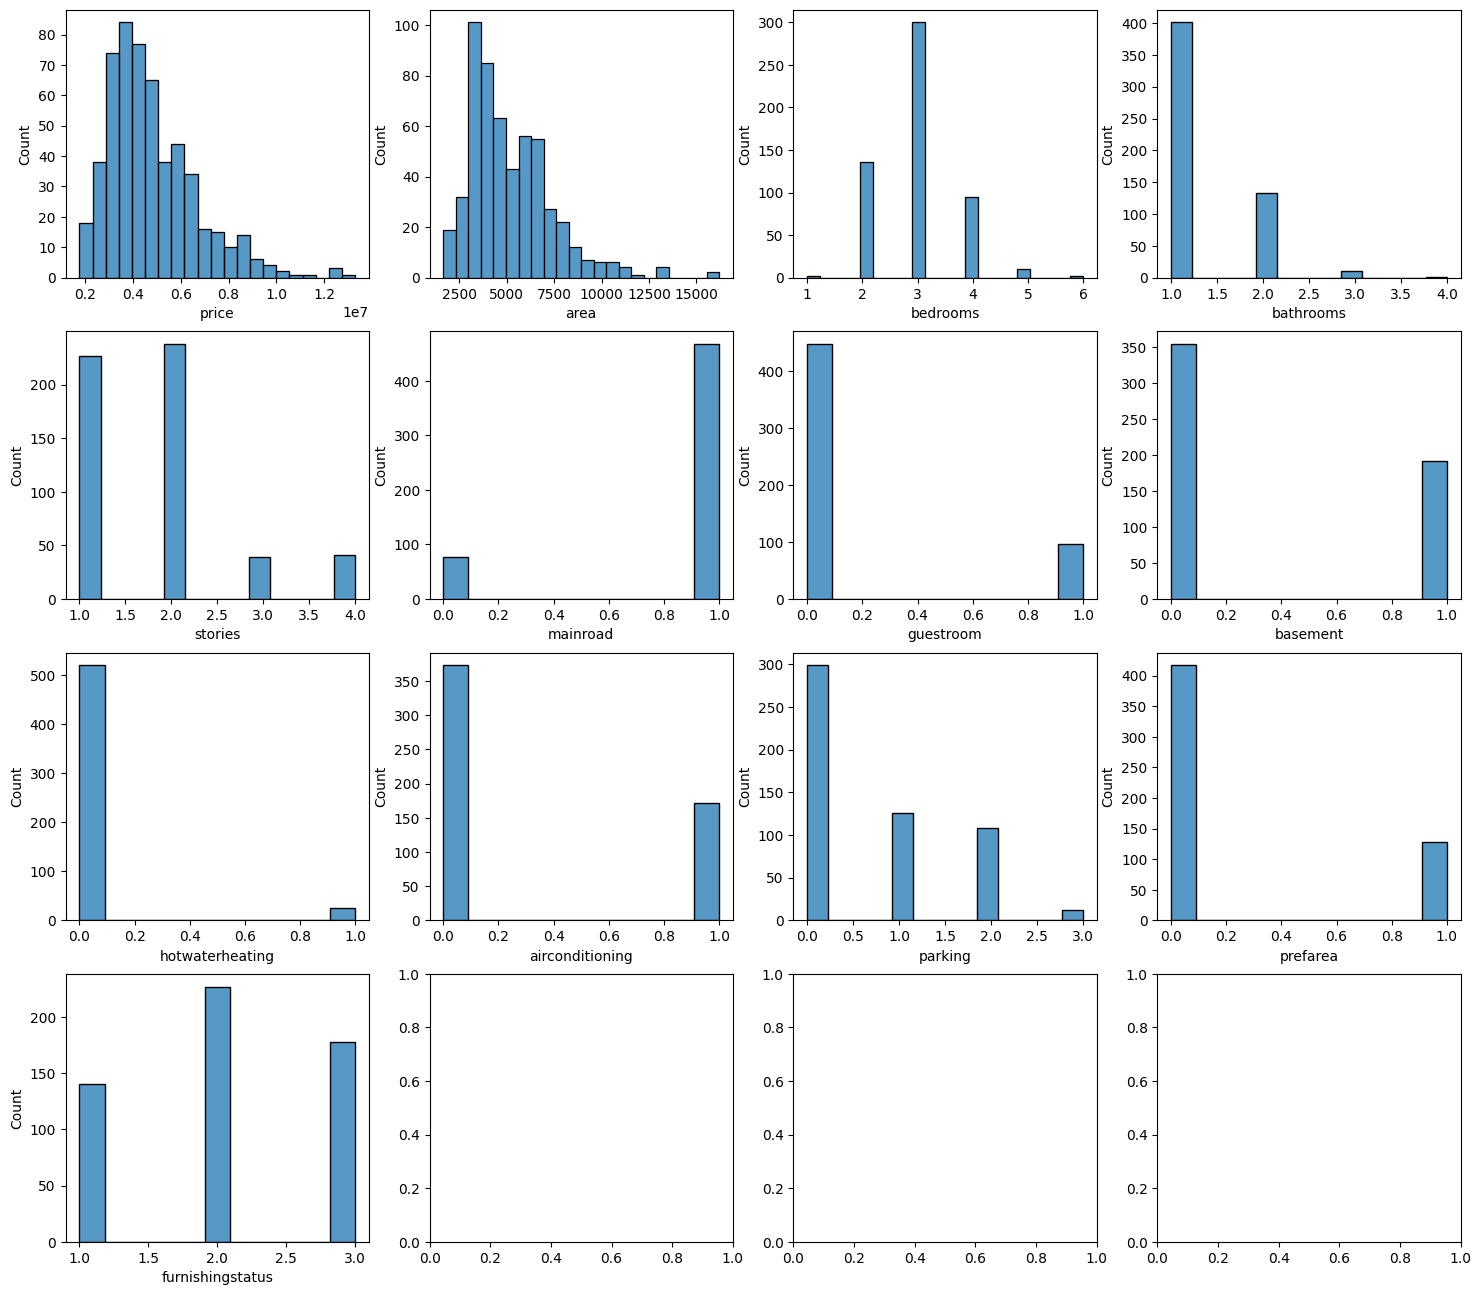

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,16))
for i, column in enumerate(df_num):
    sns.histplot(df_num[column],ax=axes[i//4, i%4], kde=False)

## Análisis Bivariado

In [16]:
df.groupby(['area','bedrooms'])['price'].mean().rename('Precio promedio por area y dormitorios').reset_index()

,area,bedrooms,Precio promedio por area y dormitorios
0,1650,3,3150000.0
1,1700,3,1890000.0
2,1836,2,2275000.0
3,1905,5,4340000.0
4,1950,3,2835000.0
...,...,...,...
368,12944,3,3500000.0
369,13200,2,6930000.0
370,13200,3,9800000.0
371,15600,3,5943000.0


In [17]:
df.groupby(['furnishingstatus']).mean().T

furnishingstatus,1,2,3
price,5495696.0,4907524.2,4013831.5
area,5688.1,5166.3,4707.6
bedrooms,3.1,3.0,2.8
bathrooms,1.4,1.3,1.2
stories,1.9,1.8,1.7
mainroad,0.9,0.9,0.8
guestroom,0.2,0.2,0.1
basement,0.4,0.4,0.3
hotwaterheating,0.0,0.1,0.0
airconditioning,0.4,0.3,0.3


In [18]:
df.groupby(['bedrooms']).mean().T

bedrooms,1,2,3,4,5,6
price,2712500.0,3632022.1,4954598.1,5729757.9,5819800.0,4791500.0
area,3710.0,4636.2,5226.6,5582.1,6291.5,3950.0
bathrooms,1.0,1.1,1.3,1.6,1.8,1.5
stories,1.0,1.2,1.9,2.3,2.0,2.0
mainroad,0.5,0.9,0.9,0.9,0.6,1.0
guestroom,0.0,0.1,0.2,0.2,0.2,0.0
basement,0.0,0.2,0.4,0.4,0.6,0.0
hotwaterheating,0.0,0.0,0.0,0.0,0.2,0.0
airconditioning,0.0,0.2,0.4,0.4,0.3,0.0
parking,0.0,0.5,0.7,0.9,0.6,0.5


In [19]:
df.groupby(['bathrooms']).mean().T

bathrooms,1,2,3,4
price,4206912.7,6209206.3,7282100.0,12250000.0
area,4920.9,5699.5,6677.0,8960.0
bedrooms,2.8,3.4,3.8,4.0
stories,1.6,2.3,2.1,4.0
mainroad,0.8,0.9,0.8,1.0
guestroom,0.1,0.3,0.3,0.0
basement,0.3,0.4,0.5,0.0
hotwaterheating,0.0,0.1,0.1,0.0
airconditioning,0.3,0.5,0.2,1.0
parking,0.6,0.9,1.1,3.0


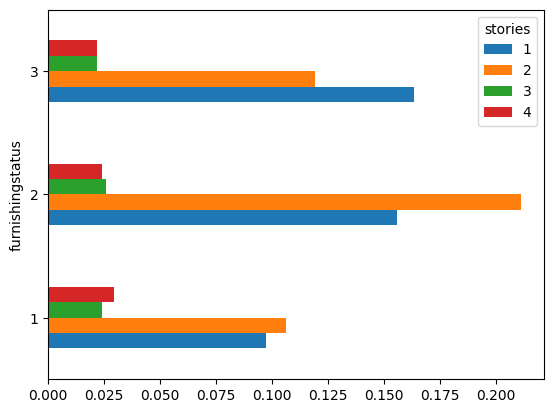

In [20]:
ct = pd.crosstab(df['furnishingstatus'], df['stories'], normalize = True).plot.barh(stacked = False)

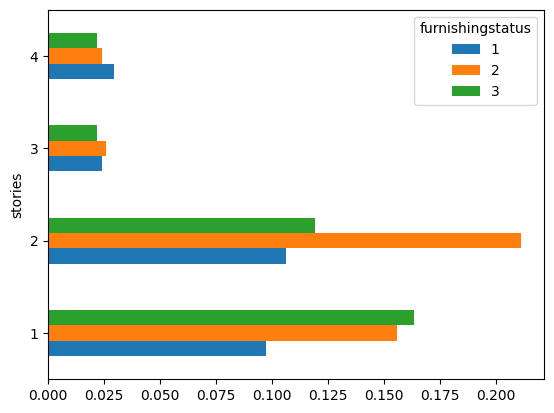

In [21]:
ct = pd.crosstab(df['stories'],df['furnishingstatus'], normalize = True).plot.barh(stacked = False)

In [30]:
print('Las areas con casas con un mayor número de cuartos')
df.groupby('area')['bedrooms'].mean().rename('No de cuartos promedio').reset_index().sort_values(by='No de cuartos promedio', ascending=False).head(5)

Las areas con casas con un mayor número de cuartos


,area,No de cuartos promedio
283,16200,5.0
216,6840,5.0
19,2520,5.0
244,7950,5.0
3,1905,5.0


In [29]:
print('Las areas con casas con un menor número de cuartos')
df.groupby('area')['bedrooms'].mean().rename('No de cuartos promedio').reset_index().sort_values(by='No de cuartos promedio', ascending=False).tail(5)

Las areas con casas con un menor número de cuartos


,area,No de cuartos promedio
33,2870,2.0
30,2835,2.0
24,2684,2.0
275,11410,2.0
2,1836,2.0


* KPIs y datos que permitan a una persona sin conocer el negocio a fondo, darse cuenta de sus magnitudes (e.g. promedio del tamaño de una casa).

In [23]:
print('KPI´S:')
print(f'El precio promedio de todas las casas es de: {df["price"].mean()}')
print(f'El promedio de cuartos por casa es de: {df["bedrooms"].mean()}')
print(f'el precio promedio de todas las casas es de: {df["price"].mean()}')

KPI´S:
El precio promedio de todas las casas es de: 4766729.247706422
El promedio de cuartos por casa es de: 2.9651376146788992
el precio promedio de todas las casas es de: 4766729.247706422


In [24]:
print('Las zonas menos costosas:')
df.groupby(['area', 'bedrooms'])['price'].mean().rename('Precio promedio por area y dormitorios').reset_index().sort_values(by='Precio promedio por area y dormitorios', ascending=False).head(5)


Las zonas menos costosas:


,area,bedrooms,Precio promedio por area y dormitorios
309,7420,4,12355000.0
345,8960,4,12250000.0
354,9960,3,12250000.0
315,7500,4,12215000.0
314,7500,3,10850000.0


In [25]:
print('Las zonas más costosas:')
df.groupby(['area', 'bedrooms'])['price'].mean().rename('Precio promedio por area y dormitorios').reset_index().sort_values(by='Precio promedio por area y dormitorios', ascending=False).tail(5)


Las zonas más costosas:


,area,bedrooms,Precio promedio por area y dormitorios
103,3649,2,1890000.0
1,1700,3,1890000.0
43,2990,2,1855000.0
95,3620,2,1750000.0
40,2910,3,1750000.0
